<a href="https://colab.research.google.com/github/Ancipes/hello-world/blob/master/SaketAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from google.colab import files
upload=files.upload()

Saving Automobile price data _Raw_.csv to Automobile price data _Raw_.csv


In [ ]:
data=pd.read_csv("Automobile price data _Raw_.csv")

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_bucket
0,3,128.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,premium
1,3,128.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,premium
2,1,128.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,premium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,premium
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,luxury


In [ ]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            0
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
price_bucket          0
dtype: int64

In [ ]:
data.replace("?",np.nan,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
i=['price','peak-rpm','horsepower','stroke','bore','normalized-losses']
for j in i:
  data[i]=data[i].astype("float")

In [ ]:

fig_1 = px.histogram(data, x='make')
fig_1.show()

In [ ]:

fig_2 = px.box(data, y='price',x='make')
fig_2.show()

In [ ]:
fi=data[data['price'].isnull()]

In [ ]:
fi.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [ ]:
data.groupby('make')['price'].median()

make
alfa-romero      16500.0
audi             17580.0
bmw              22835.0
chevrolet         6295.0
dodge             7609.0
honda             7295.0
isuzu             8916.5
jaguar           35550.0
mazda            10595.0
mercedes-benz    32892.0
mercury          16503.0
mitsubishi        8499.0
nissan            8124.0
peugot           16630.0
plymouth          7609.0
porsche          33278.0
renault           9595.0
saab             15275.0
subaru            7894.0
toyota            9103.0
volkswagen        9737.5
volvo            18420.0
Name: price, dtype: float64

In [ ]:
data.groupby('make')['price'].mean()

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

In [ ]:
data['price']=data.groupby("make")['price'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
bin_labels=['economy','economy_plus',"premium","luxury"]
data['price_bucket']=pd.qcut(data['price'],q=4,labels=bin_labels)

In [ ]:

fig_3 = px.histogram(data, x='make',color="price_bucket")
fig_3.show()

In [ ]:
fig_4 = px.box(data, y='price',x='price_bucket')
fig_4.show()

In [ ]:
data[data['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_bucket
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0,economy_plus
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0,economy_plus


In [ ]:
data.groupby("price_bucket")['horsepower'].mean()

In [ ]:
data['horsepower']=data.groupby("price_bucket")['horsepower'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig_5= make_subplots(rows=1, cols=4,subplot_titles=("Stroke", "Bore", "Normalized Losses", "Peak_RPM"))

fig_5.add_trace(
    go.Box(y=data['stroke'],x=data['price_bucket']),
    row=1, col=1
)

fig_5.add_trace(
    go.Box(y=data['bore'],x=data['price_bucket']),
    row=1, col=2
)
fig_5.add_trace(
    go.Box(y=data['normalized-losses'],x=data['price_bucket']),
    row=1, col=3
)
fig_5.add_trace(
    go.Box(y=data['peak-rpm'],x=data['price_bucket']),
    row=1, col=4
)


fig_5.update_layout(height=600, width=1000, title_text="")
fig_5.show()

In [ ]:
data['stroke']=data.groupby("price_bucket")['stroke'].apply(lambda x: x.fillna(x.median()))
data['bore']=data.groupby("price_bucket")['bore'].apply(lambda x: x.fillna(x.median()))
data['normalized-losses']=data.groupby("price_bucket")['normalized-losses'].apply(lambda x: x.fillna(x.median()))
data['peak-rpm']=data.groupby("price_bucket")['peak-rpm'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,124.190244,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.332293,3.257268,10.142537,104.090393,5126.097561,25.219512,30.751220,13276.710569
std,1.245307,32.467448,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.271445,0.313871,3.972040,39.554655,477.035772,6.542142,6.886443,7988.852331
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,128.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,145.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.shape

(205, 27)

In [ ]:
fig_6= make_subplots(rows=1, cols=4,subplot_titles=("city-mpg", "highway-mpg", "horsepower", "normalized-losses"))

fig_6.add_trace(
    go.Histogram(x=data['city-mpg']),
    row=1, col=1
)
fig_6.add_trace(
    go.Scatter(y=data['highway-mpg'],x=data['price']),
    row=1, col=2
)
fig_6.add_trace(
    go.Scatter(y=data['horsepower'],x=data['price'],mode='markers'),
    row=1, col=3
)
fig_6.add_trace(
    go.Scatter(y=data['normalized-losses'],x=data['price'],mode='markers'),
    row=1, col=4
)


fig_6.update_layout(height=600, width=1000, title_text="T")
fig_6.show()

In [ ]:
fig_7= px.scatter(data, x="city-mpg", y="price", color="price_bucket")
fig_7.show()

In [ ]:
fig_8= px.scatter(data, x="normalized-losses", y="price", color="price_bucket")
fig_8.show()

In [ ]:
fig_9= px.scatter(data, x="highway-mpg", y="price", color="price_bucket")
fig_9.show()

In [ ]:
fig_10= px.scatter(data, x="horsepower", y="price", color="price_bucket")
fig_10.show()

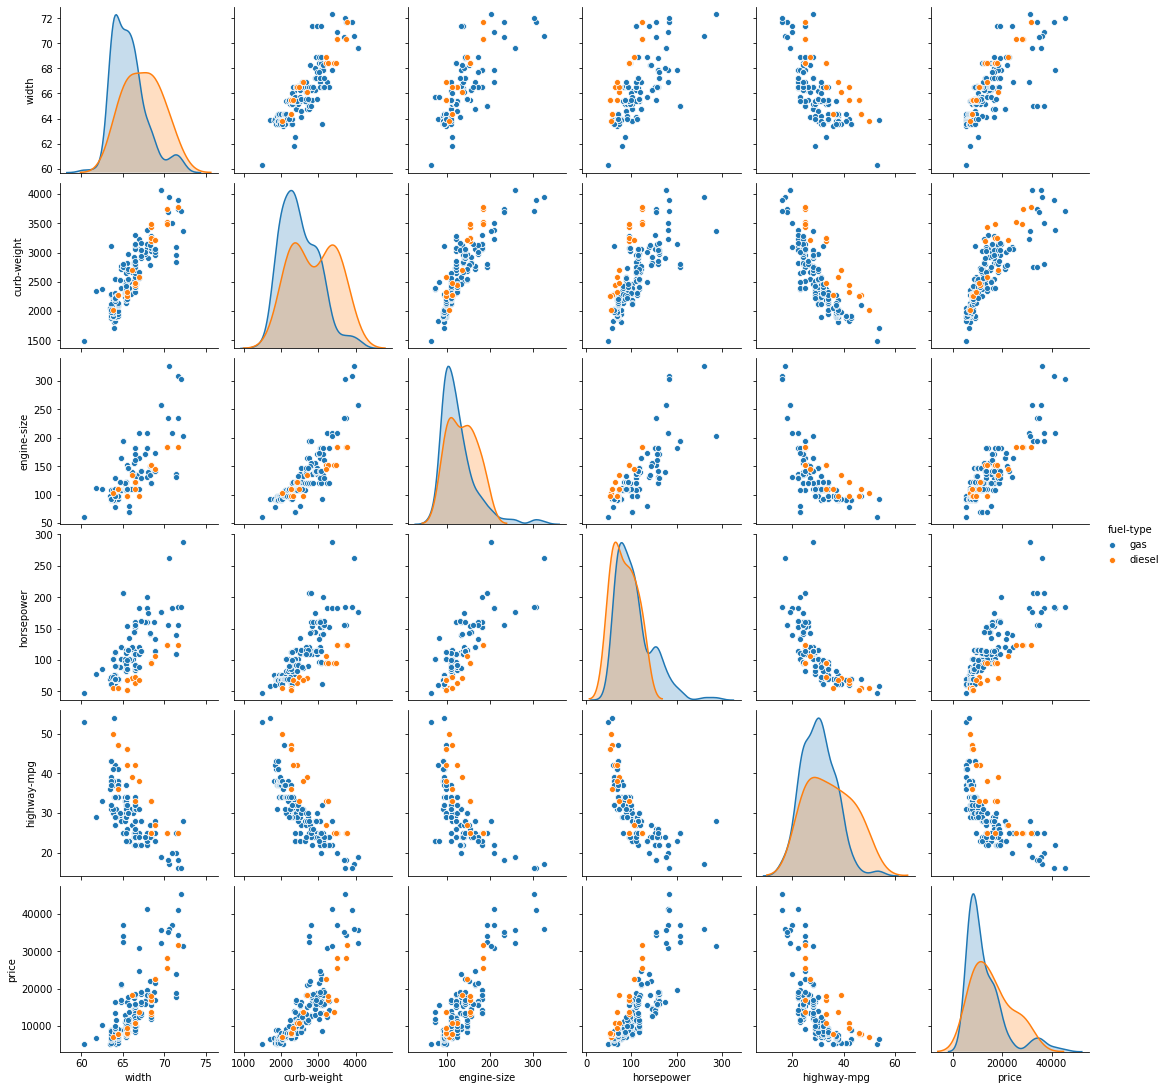

In [ ]:
ax = sns.pairplot(data[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price",]], hue="fuel-type")

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 851kB/s 


In [ ]:
import chart_studio

In [ ]:
username = 'Ancipes' # your username
api_key = 'IWPmscHkDD4ncW76k3cV' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
import chart_studio.plotly as py
py.plot(fig, filename = 'automobiletest', auto_open=True)

In [ ]:
import chart_studio.plotly as py
figures=[fig_1,fig_2,fig_3,fig_4,fig_5,fig_6,fig_7,fig_8,fig_9,fig_10]
c=0
for i in figures:
  py.plot(i,filename="Test"+str(c),auto_open=True)
  c+=1

In [ ]:
for i,j in zip(figures):
  print(i,j)

ValueError: ignored

NameError: ignored

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="price",color="fuel-type",marginal="box")
fig.show()

In [ ]:
fig_8= px.scatter(data, x="normalized-losses", y="num-of-doors", color="price_bucket")
fig_8.show()

In [ ]:
import chart_studio.plotly as py
py.plot(fig, filename = 'automobiletest', auto_open=True)